In [81]:
import cv2
import string
import random
import numpy as np
from PIL import Image
from PIL.ImageDraw import Draw
from captcha import ImageCaptcha
from captcha import random_color

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
image = ImageCaptcha(width=64, height=64, font_sizes=(64, 64, 64))

In [84]:
az = string.ascii_lowercase
AZ = string.ascii_uppercase
nm = string.digits

In [85]:
all_selections = []

for i in range(len(az)):
    all_selections.append(az[i])

for i in range(len(AZ)):
    all_selections.append(AZ[i])

for i in range(len(nm)):
    all_selections.append(nm[i])

In [86]:
len(all_selections)

62

In [87]:
print(all_selections)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [88]:
def create_noise_dots(image, color, width=2, number=125):
    draw = Draw(image)
    w, h = image.size
    while number:
        x1 = random.randint(0, w)
        y1 = random.randint(0, h)
        draw.line(((x1, y1), (x1 - 1, y1 - 1)), fill=color, width=width)
        number -= 1
    return image

In [199]:
def create_noise_curve(image, color):
    w, h = image.size
    x1 = random.randint(0, int(w / 5))
    x2 = random.randint(w - int(w / 5), w)
    y1 = random.randint(25, 45)
    y2 = random.randint(y1, h)
    points = [x1, y1, x2, y2]
    end = random.randint(160, 200)
    start = random.randint(0, 20)
    Draw(image).arc(points, start, end, fill=color)
    return image

In [200]:
all_data = []
all_lbls = []

for _ in range(5):
    idx  = random.randint(0, len(all_selections)-1)
    data = image.generate_image(all_selections[idx])
    all_lbls.append(all_selections[idx])
    all_data.append(data)

In [201]:
total_w = 0
for i in all_data:
    pix = np.array(i)
    h, w, _ = pix.shape
    total_w += w

In [202]:
canvas = np.ones((90, total_w + 20, 3)).astype(np.uint8) * 255

In [203]:
all_bbox = []

In [204]:
prev_w= 10
for i in all_data:
    pix = np.array(i)
    h, w, _ = pix.shape
    # print(pix.shape)
    # Get BBox's
    h1 = 10
    w1 = prev_w
    h2 = h
    w2 = w-4
    all_bbox.append([w1, h1, w2, h2])
    # Paint Canvas
    canvas[10:10+h, prev_w:prev_w+w, :] = pix
    prev_w += w

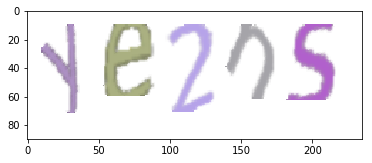

In [205]:
plt.imshow(canvas)
plt.show()

In [206]:
im = Image.fromarray(canvas)

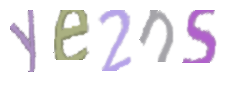

In [207]:
im

In [208]:
color = random_color(10, 200, random.randint(220, 255))
im = create_noise_dots(im, color)
color = random_color(10, 200, random.randint(220, 255))
im = create_noise_dots(im, color)
color = random_color(10, 200, random.randint(220, 255))
im = create_noise_curve(im, color)

In [209]:
canvas = np.array(im)

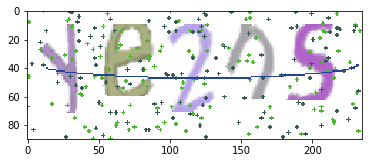

In [210]:
plt.imshow(canvas)
plt.show()

In [211]:
for i in range(len(all_bbox)):
    x, y, w, h = all_bbox[i]
    cv2.rectangle(canvas,(x,y),(x+w,y+h),(255,0,0), 1)

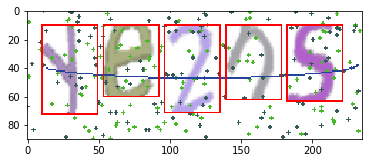

In [212]:
plt.imshow(canvas)
plt.show()

In [103]:
print all_lbls

['9', 'C', 'f', 'y', 'F']


In [104]:
all_bbox

[[10, 10, 39, 65],
 [53, 10, 39, 64],
 [96, 10, 39, 54],
 [139, 10, 39, 65],
 [182, 10, 39, 58]]